In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = '../Exported_Data/AllParticipants_RightLeg_EMG_IMU.csv'

imu_cols = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']
participants = ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10']

try:
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully. Total rows: {len(df)}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
    # Exit or stop execution if file is not found
    # exit()

Data loaded successfully. Total rows: 25200


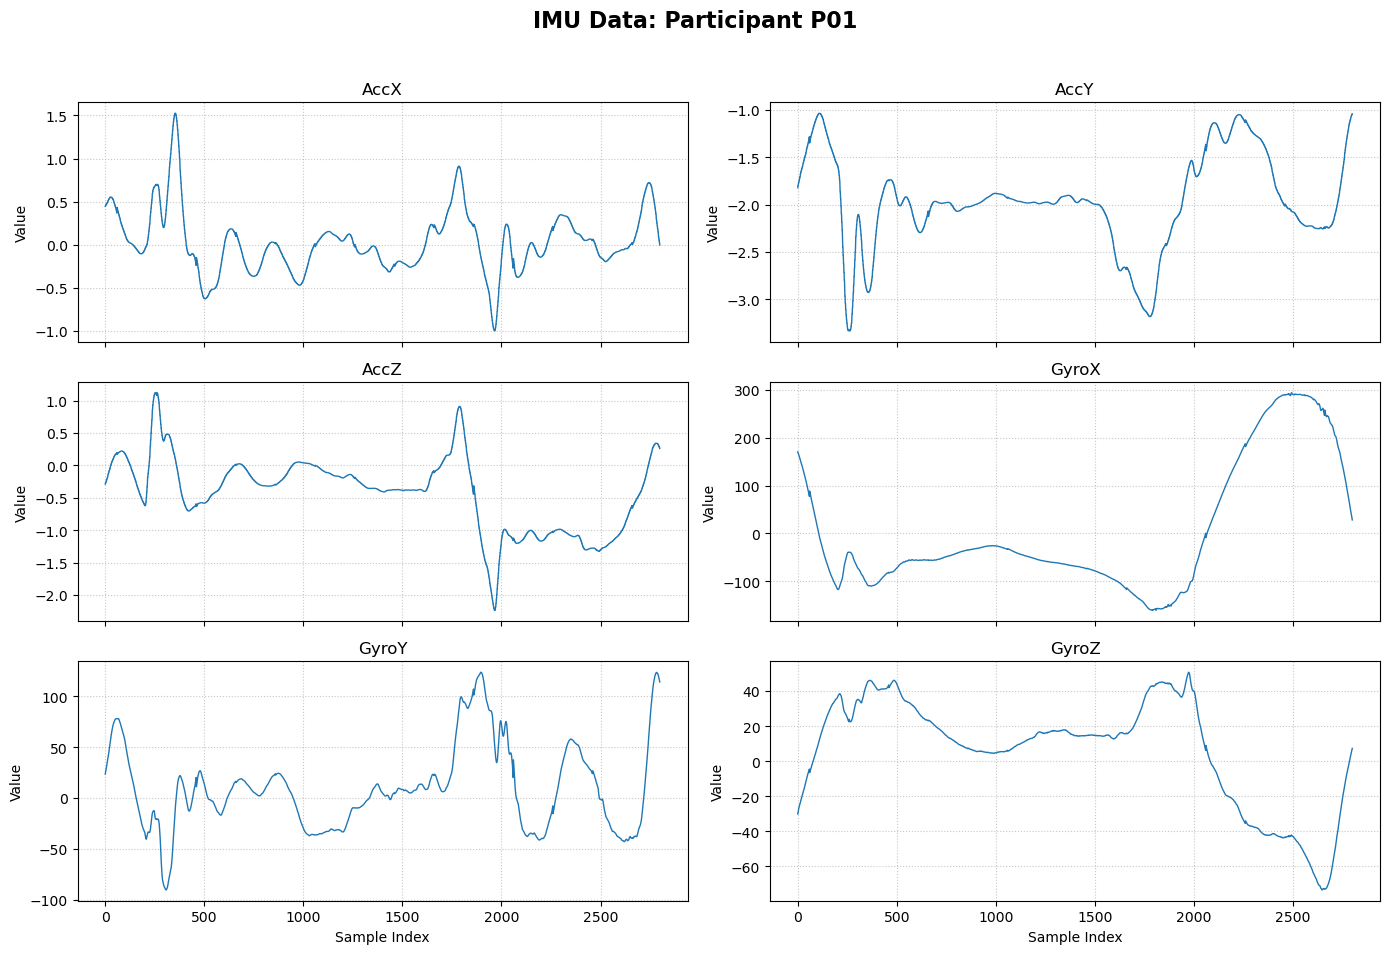

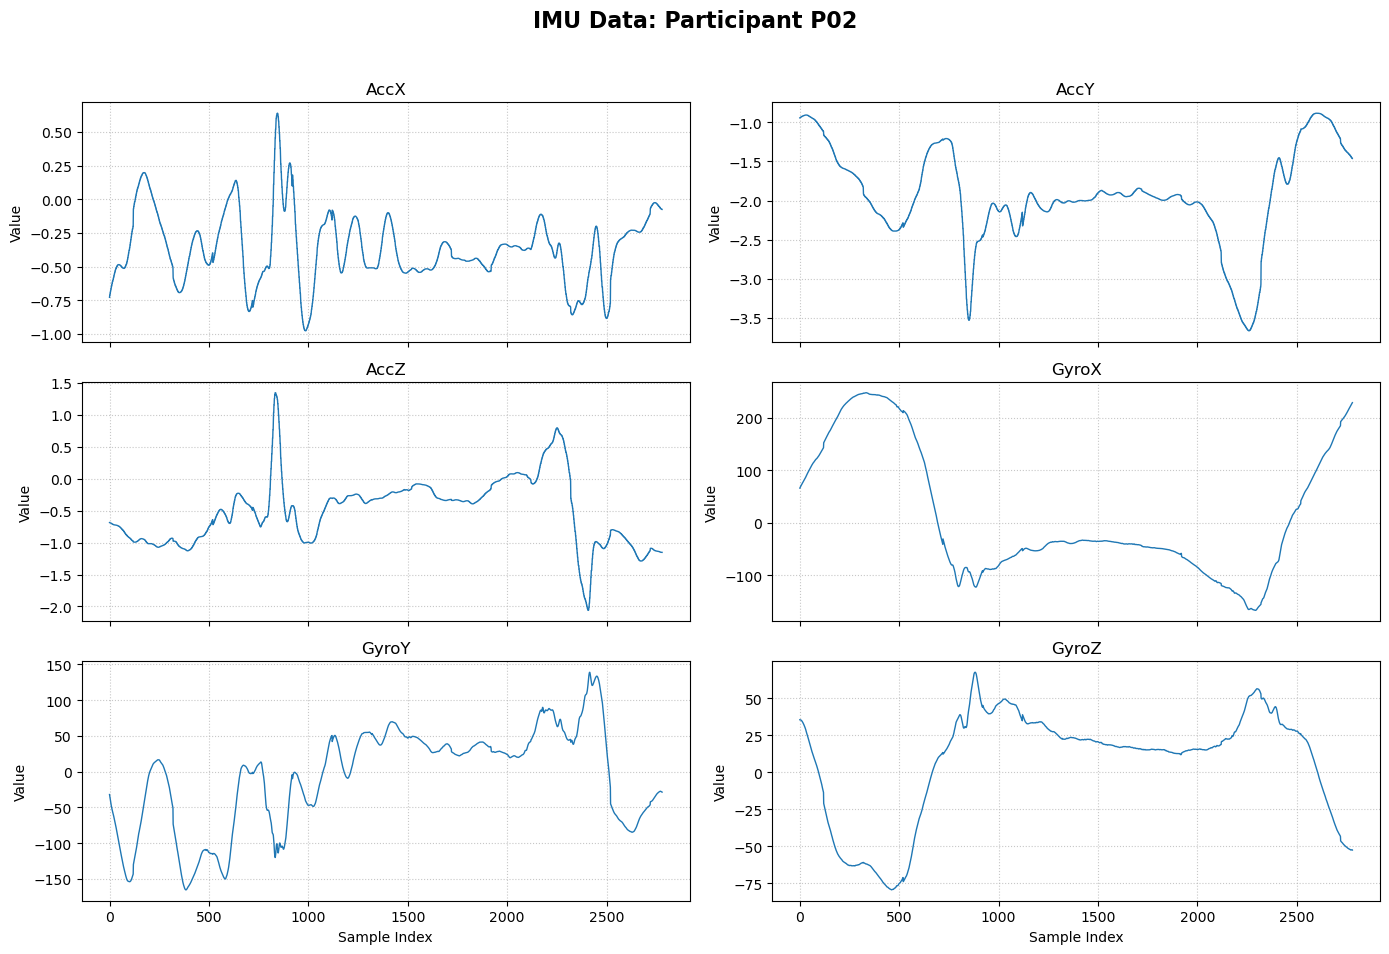

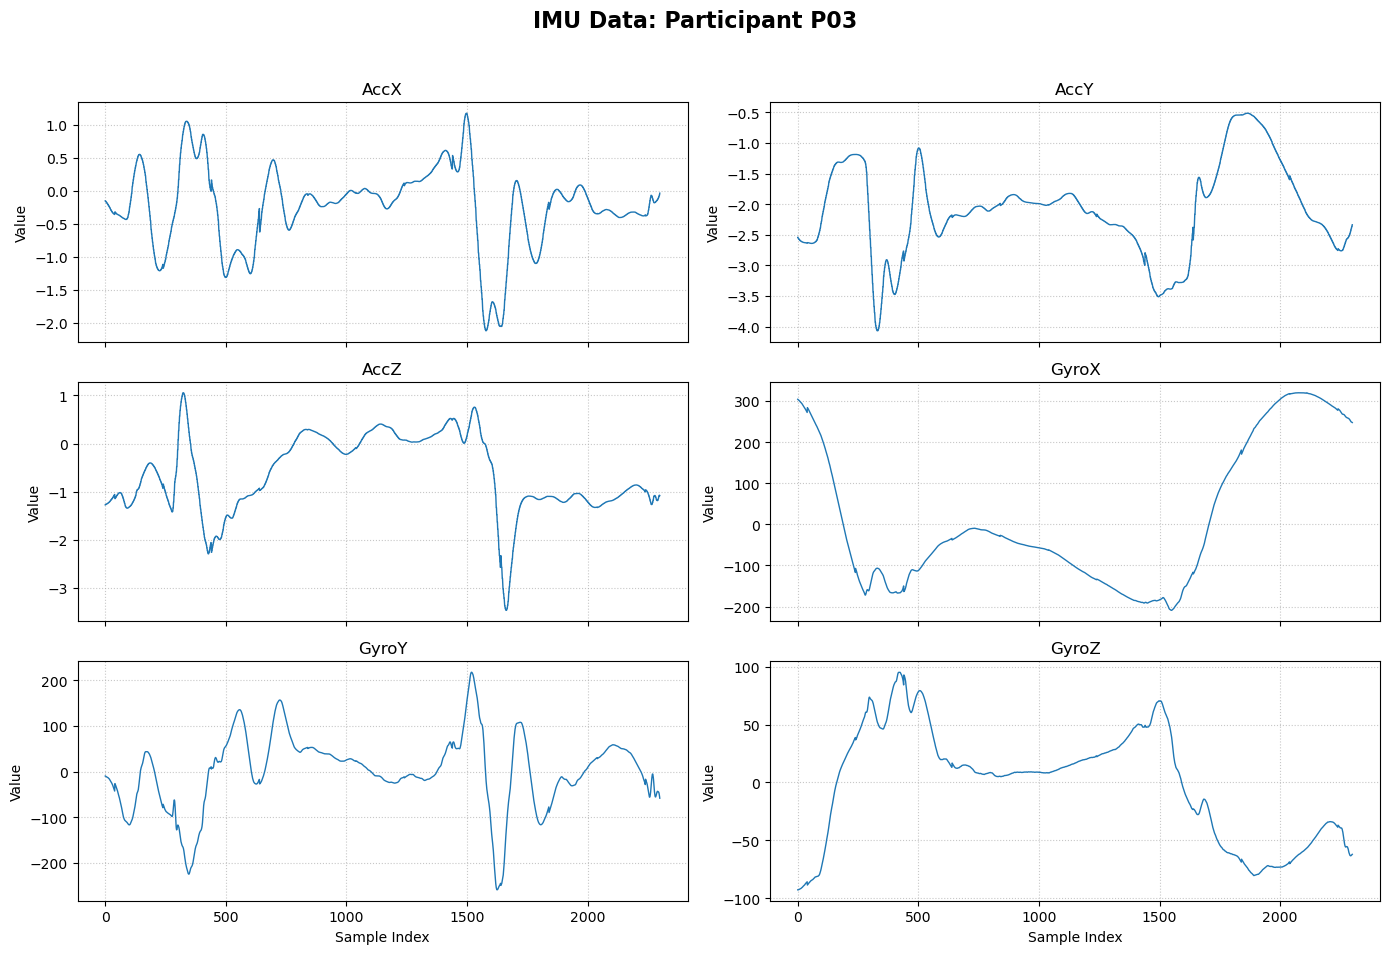

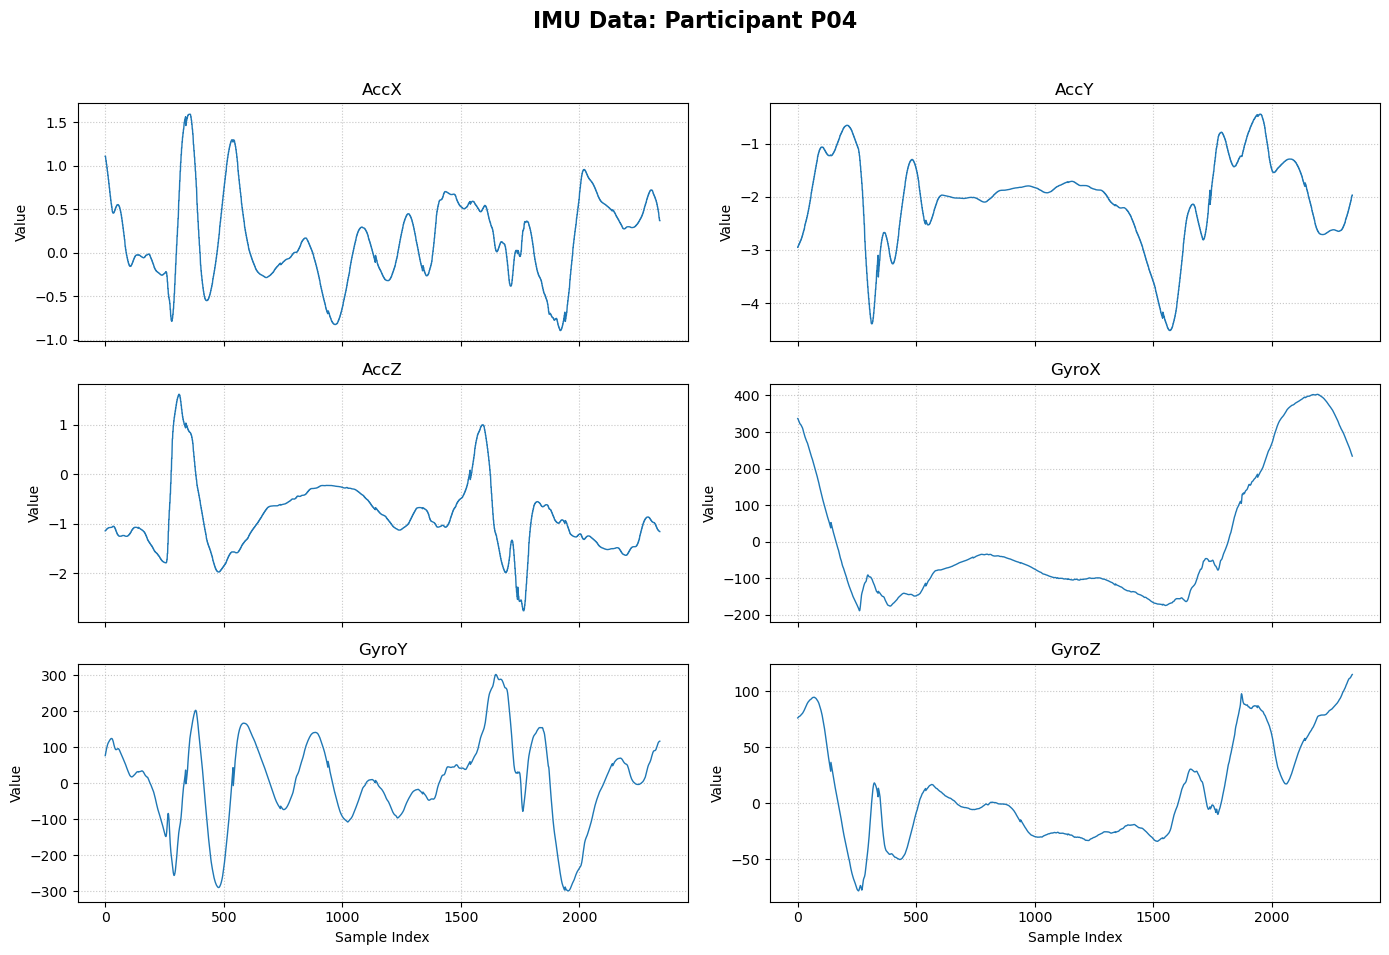

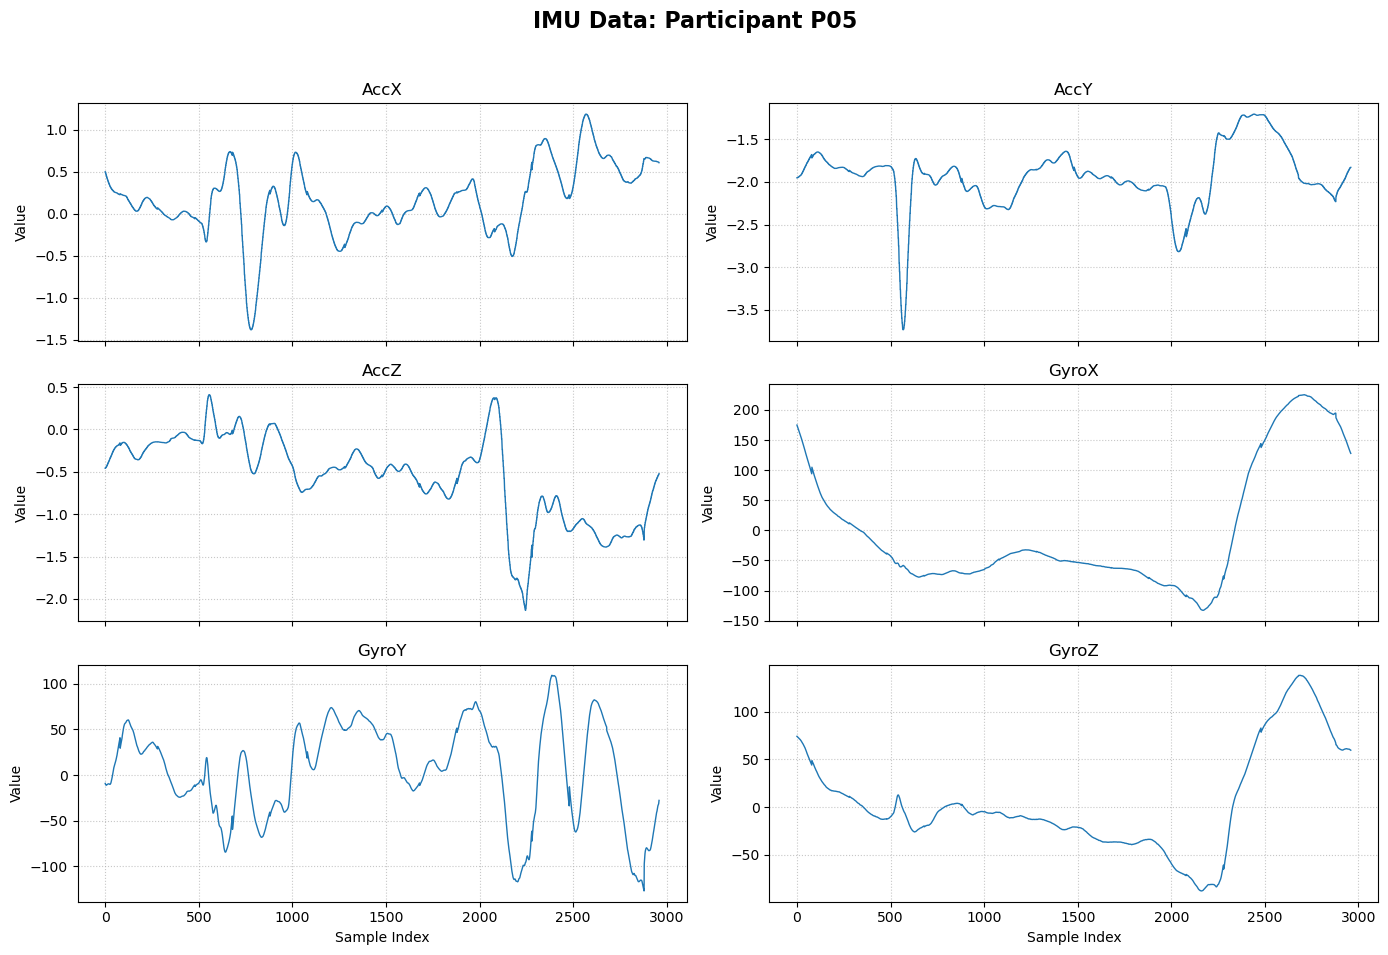

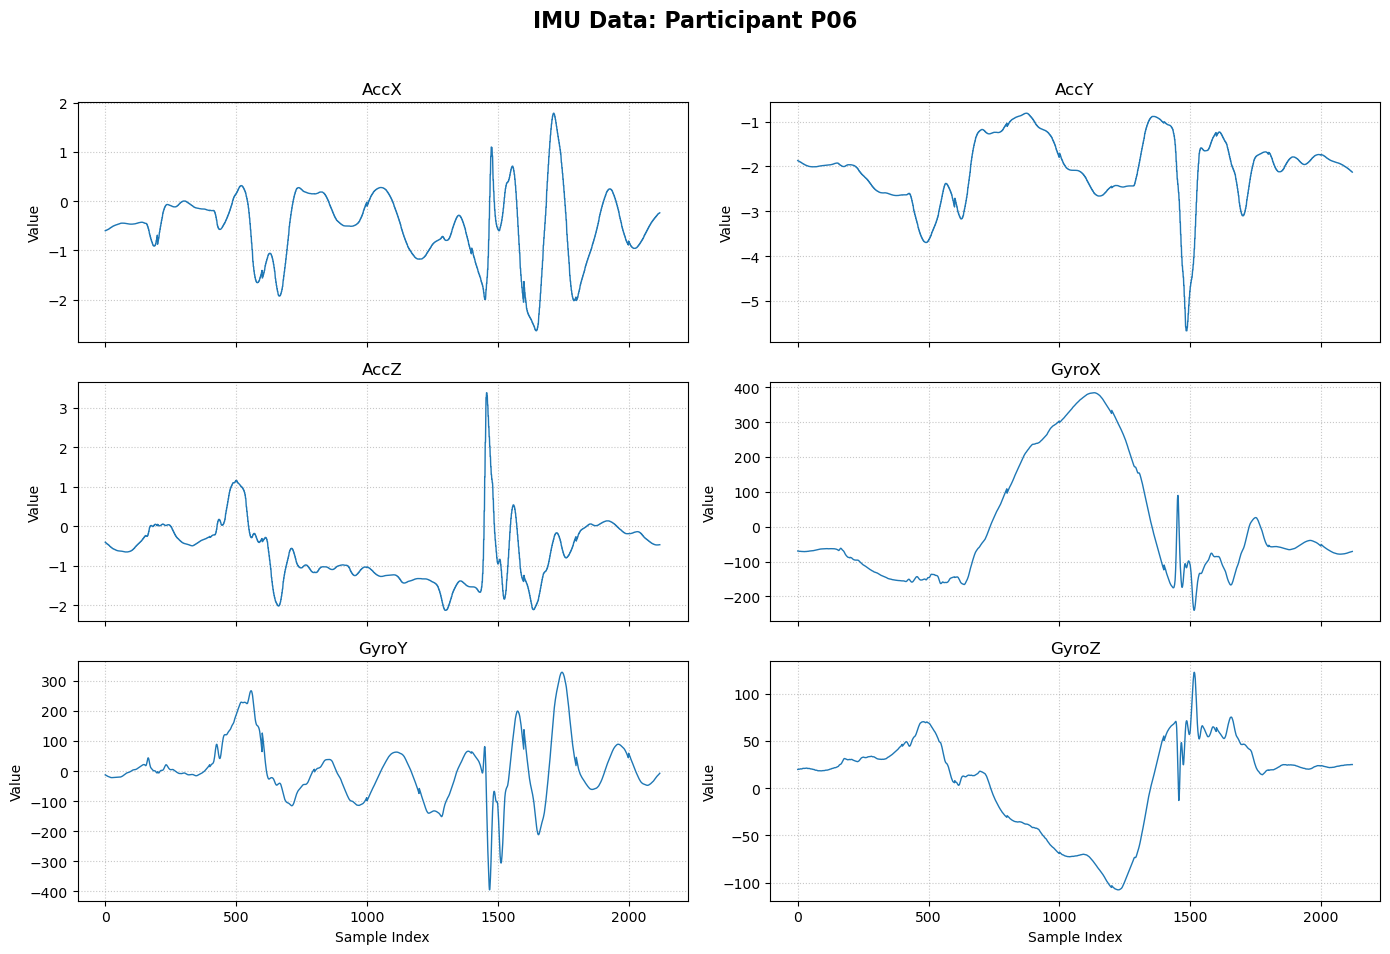

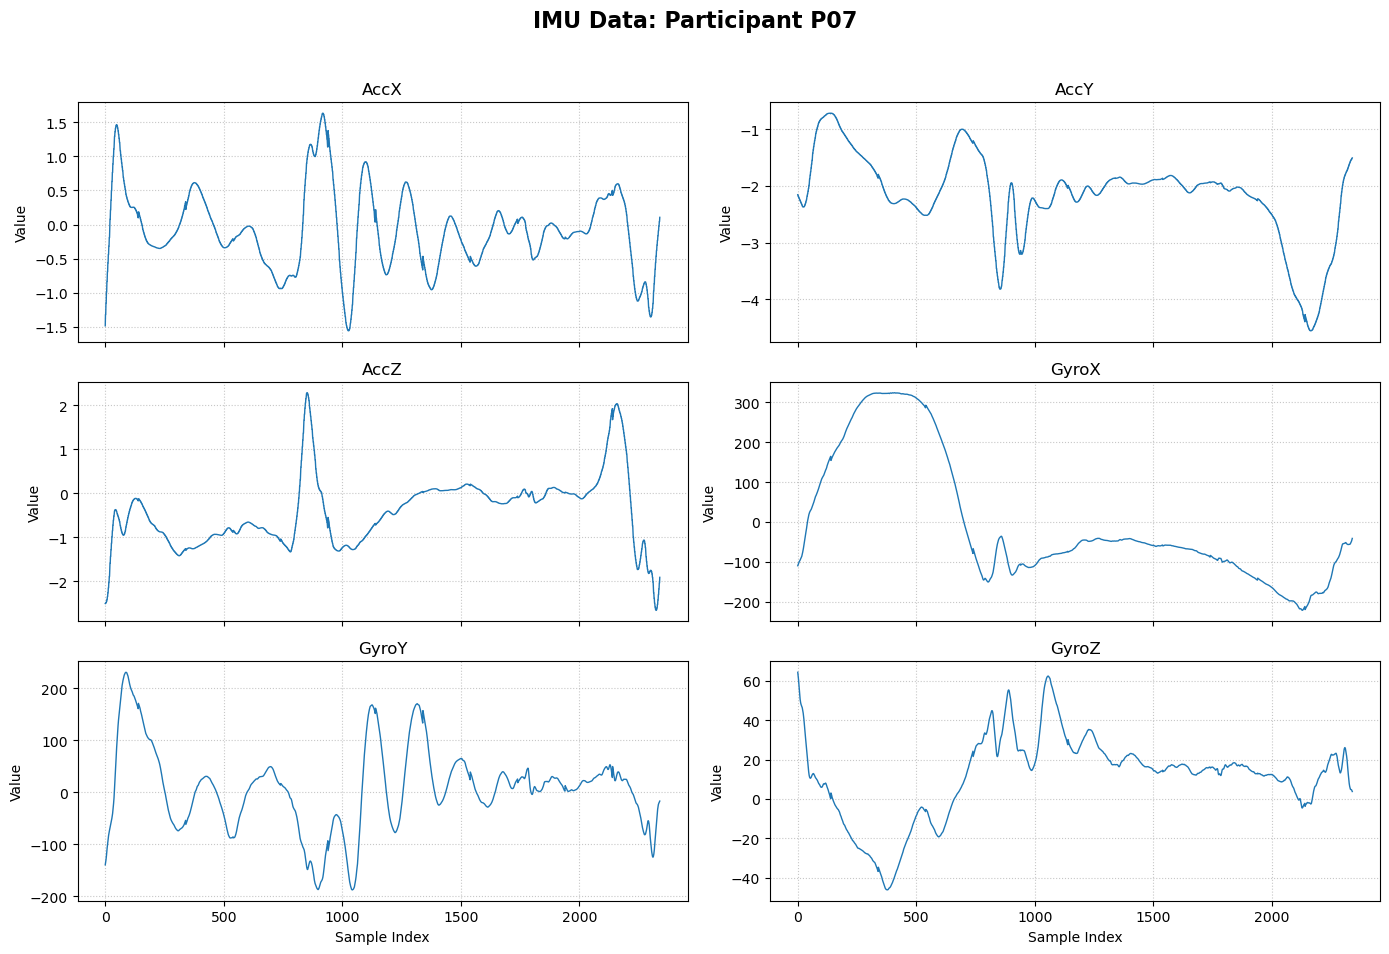

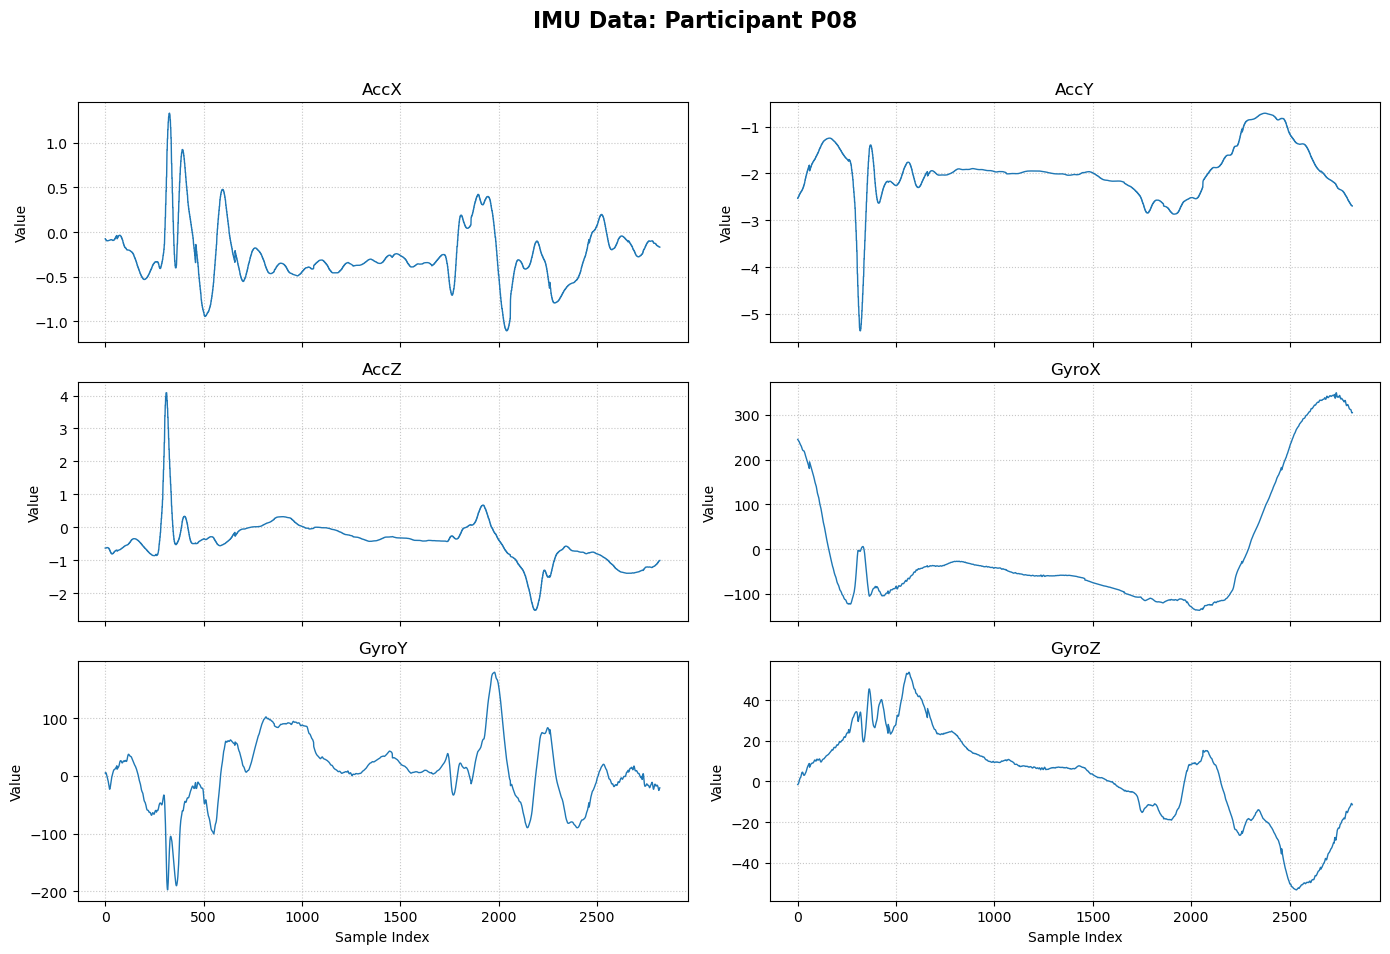

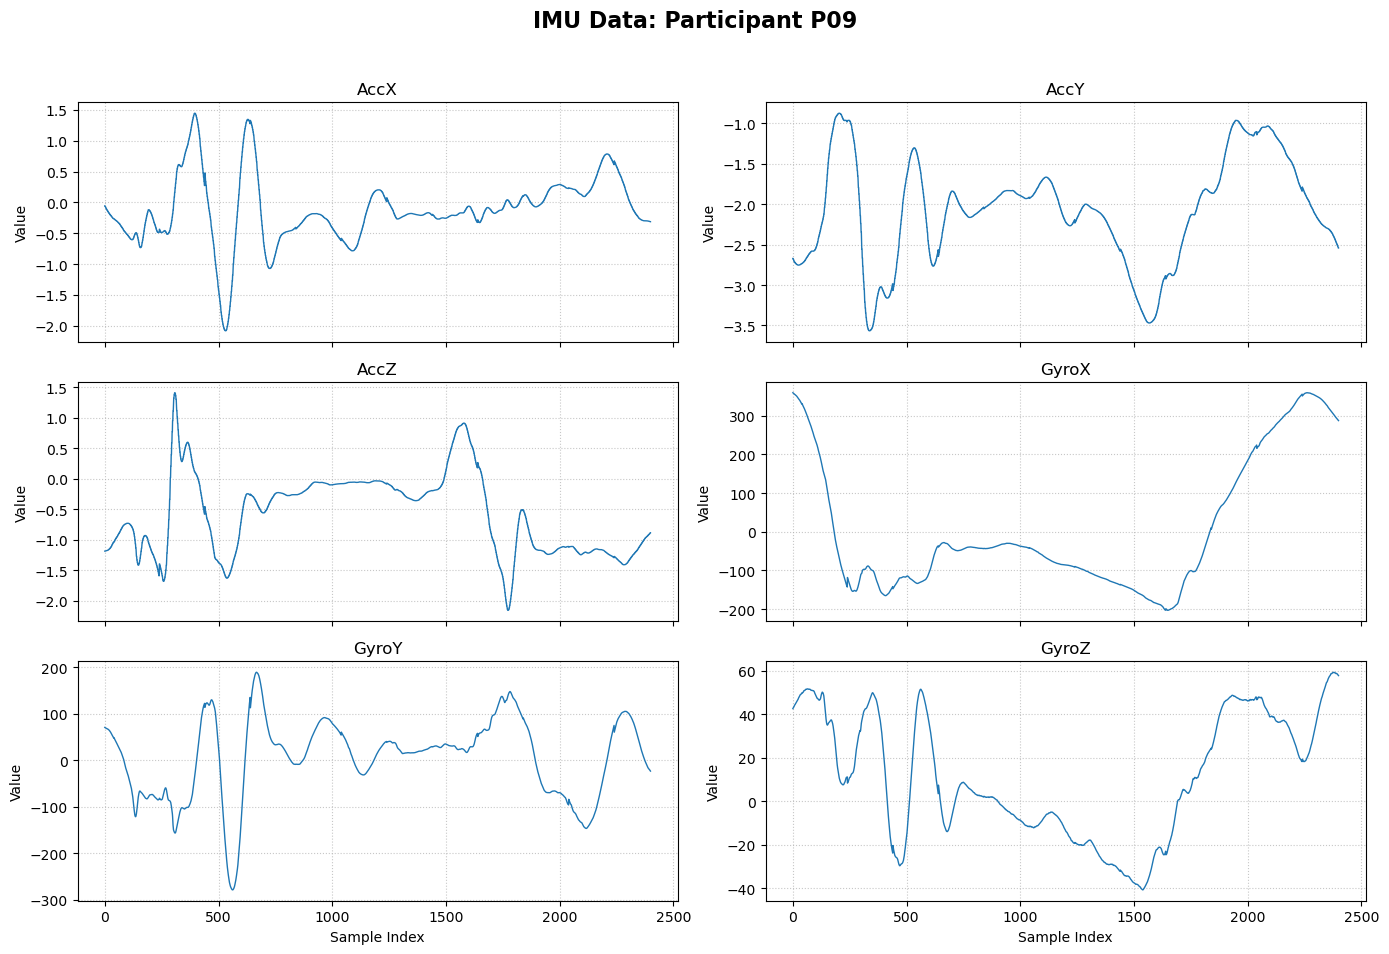

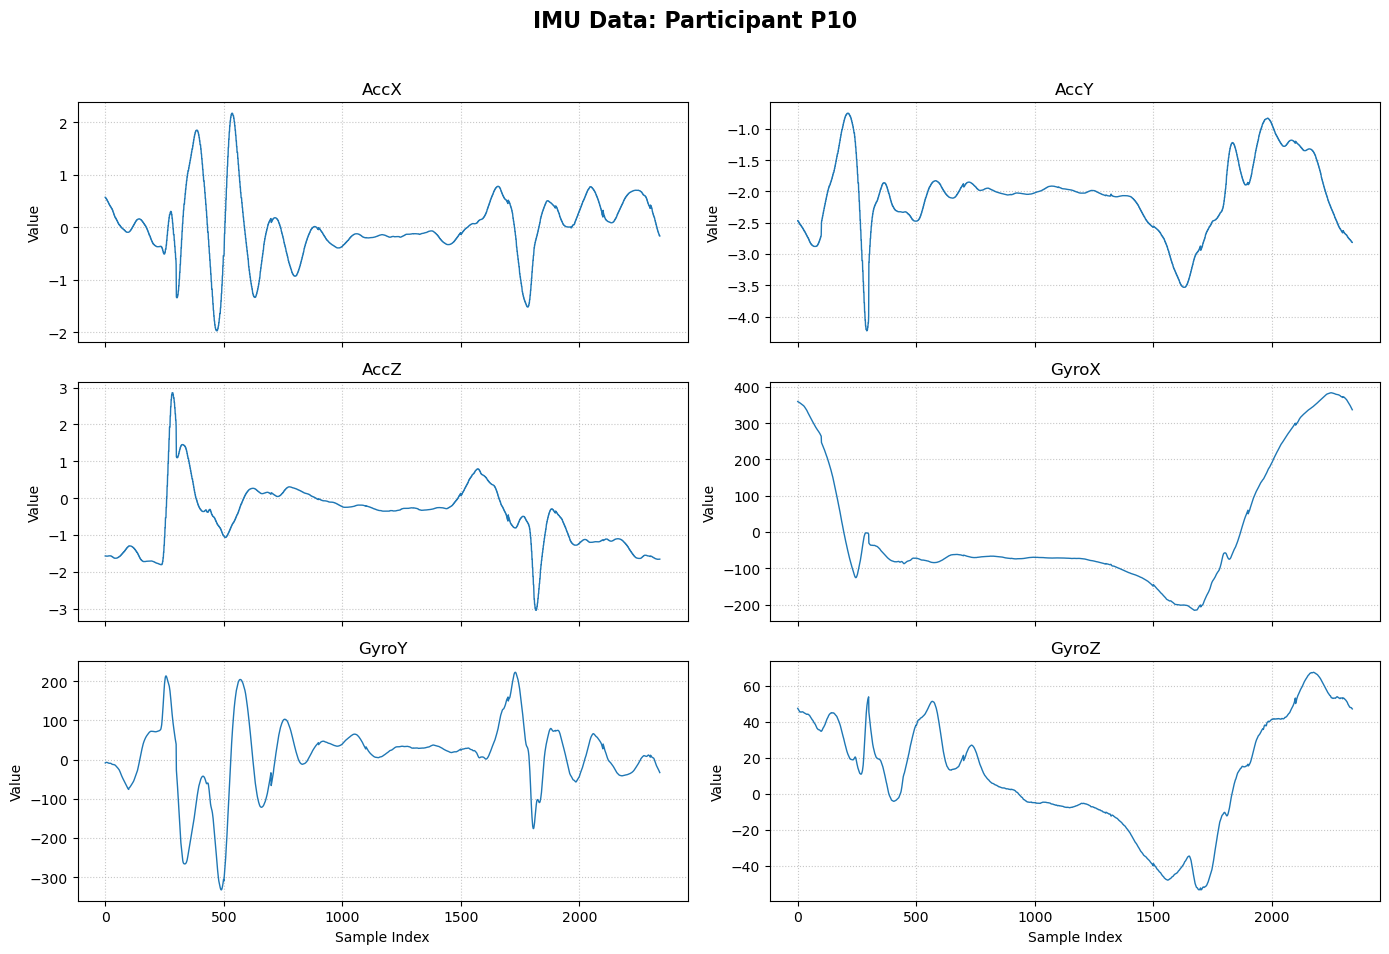

In [4]:
# --- Generate Plots per Participant ---
for pID in participants:
    # a. Filter data for the current participant
    df_filtered = df[df['Participant'] == pID].copy()
    
    # Check if data exists for the participant
    if df_filtered.empty:
        print(f"Warning: No data found for participant {pID}. Skipping plot.")
        continue

    # Prepare sequential index for plotting
    df_filtered.reset_index(drop=True, inplace=True)
    
    # b. Set up the figure with 3 rows and 2 columns
    fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
    fig.suptitle(f'IMU Data: Participant {pID}', fontsize=16, fontweight='bold')

    # Flatten the axes array to easily iterate through subplots
    axes = axes.flatten()

    # c & d. Loop through IMU features and plot
    for i, col in enumerate(imu_cols):
        # Use try/except to handle cases where a column might be missing (e.g., if IMU data was NaN-filled)
        try:
            axes[i].plot(df_filtered[col], linewidth=1.0)
        except KeyError:
            axes[i].text(0.5, 0.5, 'Data Missing', ha='center', va='center', fontsize=12, color='red')
        
        # e. Add titles and labels
        axes[i].set_title(col, fontsize=12)
        axes[i].set_ylabel('Value', fontsize=10)
        axes[i].grid(True, linestyle=':', alpha=0.7)

    # Set a common x-label for the bottom row only
    for ax in [axes[4], axes[5]]:
        ax.set_xlabel('Sample Index', fontsize=10)
        
    # f. Display the figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout for suptitle
    plt.show()
    
# Clean up (optional: close all figures in memory if you were not using plt.show())
# plt.close('all')